# Regression model evaluation in Machine Learning

In [26]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

### Load the data to DataFrame

In [9]:
from sklearn.datasets import load_iris

data = load_iris()
iris_df = pd.DataFrame(data=data["data"], columns=data["feature_names"])
iris_df["targets"] = data["target"]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Find the relations between variables

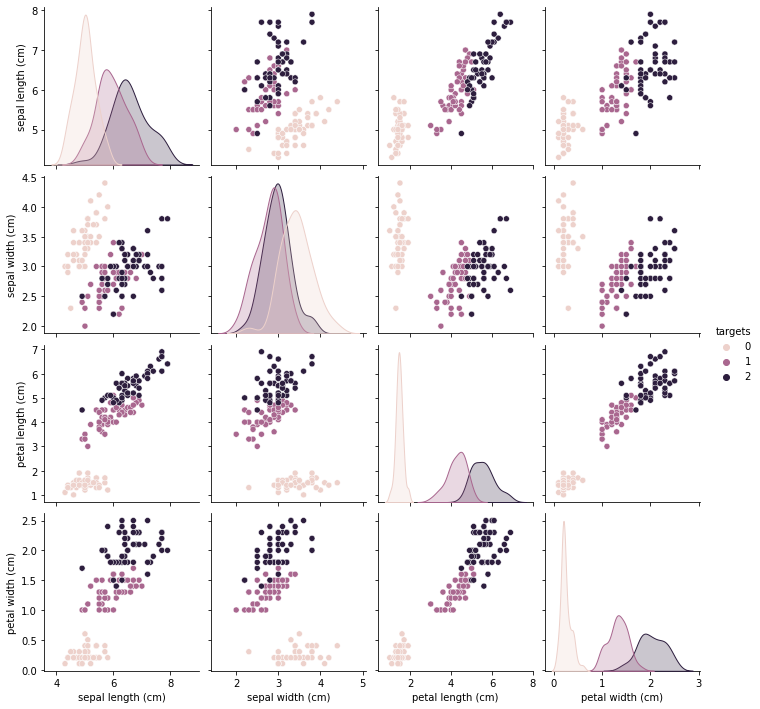

In [10]:
sn.pairplot(iris_df, hue="targets")

From the plots above one can tell that the relationship between `petal length` and `petal width` tends to be linear, so we should be able to predict `petal width` using the `petal length` measurements feeded linear model.

<AxesSubplot:>

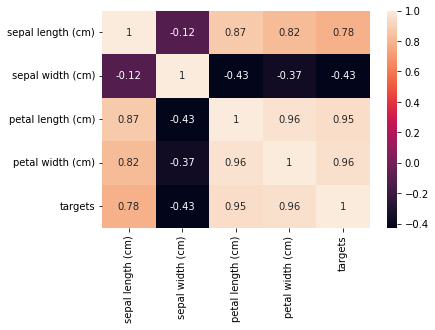

In [12]:
iris_correlations = iris_df.corr()
sn.heatmap(data=iris_correlations, annot=True)

On heatmap above we can see the high correlation between `petal length` and `petal width`.<br>
<br>

### Choose two columns with high correlation 

In [17]:
petal_data = iris_df[["petal length (cm)", "petal width (cm)"]]
petal_data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Create and train the model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(petal_data["petal length (cm)"], petal_data["petal width (cm)"], test_size=0.2, random_state=1234)
model = LinearRegression()

# Train the model
x_train = np.array(X_train)
model.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

### Make predictions

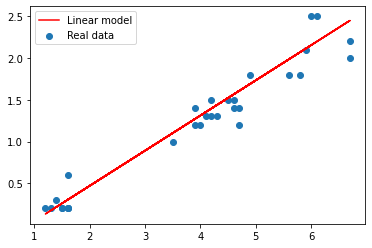

In [46]:
x_test = np.array(X_test)
prediction = model.predict(x_test.reshape(-1, 1))

plt.plot(x_test, prediction, c="r", label="Linear model")
plt.scatter(x_test, y_test, label="Real data")
plt.legend()

## Model evaluation

### Mean Absolute Error MAE

In [51]:
from sklearn.metrics import mean_absolute_error

mae = np.round(mean_absolute_error(y_test, prediction),2)
print(mae)

0.15


### Mean squared error MSE

In [52]:
from sklearn.metrics import mean_squared_error

mse = np.round(mean_squared_error(y_test, prediction),2)
print(mse)

0.04


### Root mean squared error RMSE

In [53]:
from sklearn.metrics import mean_squared_error

rmse = np.round(mean_squared_error(y_test, prediction, squared=False),2)
print(rmse)

0.19


### Coefficient of determination or R2 score (Higher is better)

In [54]:
from sklearn.metrics import r2_score

r2 = np.round(r2_score(y_test, prediction),2)
print(r2)

0.93


In [65]:
d = {
    "MAE": [mae],
    "MSE": [mse],
    "RMSE": [rmse],
    "R2": [r2],
}

metrics_data = pd.DataFrame(data=d)
metrics_data.head()

,MAE,MSE,RMSE,R2
0,0.15,0.04,0.19,0.93


<AxesSubplot:>

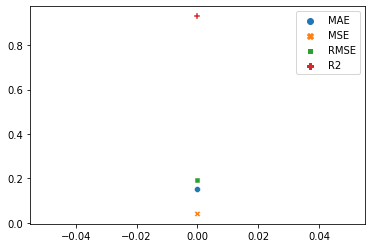

In [73]:
sn.scatterplot(data=metrics_data)